<a href="https://colab.research.google.com/github/Meera-Ajay-25/LGMVIP-DataScience/blob/main/Fetal_Health_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***FETAL HEALTH CLASSIFICATION USING MACHINE LEARNING MODELS AND COMPARISON OF RESULTS USING PRINCIPAL COMPONENT ANALYSIS***

1)The specific objectives of this study is to classify / predict the health of a fetus as normal, suspect or pathological (is at high risk) using 4 classification algorithms 

a) **Gradient boost** 

b) **Decision tree**

c) **Random forest**. 

d) **KNN** 

2) To compare the results when a dimensionality reduction technique, **principal component analysis** is used


**ABSTRACT**

Pregnancy is a cycle that invites us to give upon the hidden power of all life. A stable pregnancy is a good thing. The likelihood of safe pregnancy is increased by timely and daily fetal treatment. But perinatal mortality is an alarming issue in the world which needs immediate attention. To address this issue both intrapartum and antepartum fetal health state monitoring is essential. Fetal and maternal risk can be assessed by monitoring the fetal heart rate. Cardiotocography records the fetal heart rate and uterine contractions and it is this CTG data which is used in this study. This study mainly focus on analyzing the fetal state using four supervised machine learning models which are gradient boosting, random forest, decision tree and k-nearest neighbors. It also focuses on analyzing the results after applying a dimensionality reduction which is principal component analysis. The modeling results proved that gradient boosting algorithm is the optimal model of choice for the dataset used as it has relatively highest combination of precision, recall and F scores. Also after applying principal component analysis it is observed that all the models gave higher accuracies than that was obtained before reducing the dimension of the dataset. 

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
#Splitting the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
# Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
# Model Stacking
from sklearn.ensemble import StackingClassifier
# For Hyper-parameter Tuning the model
from sklearn.model_selection import GridSearchCV

# For checking Model Performance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve

import warnings
warnings.simplefilter(action="ignore")

In [2]:
#Reading the dataset using pandas library
fetal_data=pd.read_csv('/content/fetal_health.csv')
fetal_data

baseline value[FHR]  accelerations  fetal_movement  \
0                     120          0.000           0.000   
1                     132          0.006           0.000   
2                     133          0.003           0.000   
3                     134          0.003           0.000   
4                     132          0.007           0.000   
...                   ...            ...             ...   
2121                  140          0.000           0.000   
2122                  140          0.001           0.000   
2123                  140          0.001           0.000   
2124                  140          0.001           0.000   
2125                  142          0.002           0.002   

      uterine_contractions  light_decelerations  severe_decelerations  \
0                    0.000                0.000                   0.0   
1                    0.006                0.003                   0.0   
2                    0.008                0.003                   0.0   
3                    0.008                0.003                   0.0   
4                    0.008                0.000                   0.0   
...                    ...                  ...                   ...   
2121                 0.007                0.000                   0.0   
2122                 0.007                0.000                   0.0   
2123                 0.007                0.000                   0.0   
2124                 0.006                0.000                   0.0   
2125                 0.008                0.000                   0.0   

      prolongued_decelerations  abnormal_short_term_variability  \
0                          0.0                               73   
1                          0.0                               17   
2                          0.0                               16   
3                          0.0                               16   
4                          0.0                               16   
...                        ...                              ...   
2121                       0.0                               79   
2122                       0.0                               78   
2123                       0.0                               79   
2124                       0.0                               78   
2125                       0.0                               74   

      mean_value_of_short_term_variability  \
0                                      0.5   
1                                      2.1   
2                                      2.1   
3                                      2.4   
4                                      2.4   
...                                    ...   
2121                                   0.2   
2122                                   0.4   
2123                                   0.4   
2124                                   0.4   
2125                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                    43       ...   
1                                                     0       ...   
2                                                     0       ...   
3                                                     0       ...   
4                                                     0       ...   
...                                                 ...       ...   
2121                                                 25       ...   
2122                                                 22       ...   
2123                                                 20       ...   
2124                                                 27       ...   
2125                                                 36       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0                62            126                          2   
1                68            198                          6   
2                68       

The dataset used in this project is a labeled data of fetal health obtained from the CTG data of 2127 pregnant women. There are 21 independent variables and 1 dependent variable and the dependent variable being the fetal health denoted by 1, 2, 3 where1, 2 and 3 represents normal, suspect or is at high risk. There are 2127 rows and 22 columns in the data set.

In [4]:
#checking for null values
null=fetal_data.isnull().sum()
null

baseline value[FHR]                                       0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

There are no null values hence the data is clean.

In [6]:
#checking the shape of data
fetal_data.shape

(2126, 22)

In [8]:
#checking data types
fetal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value[FHR]                                     2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

All the values in the dataset are integers or float. There are no string values in the dataset.

In [9]:
# Analysing statistical insights
fetal_data.describe()

baseline value[FHR]  accelerations  fetal_movement  \
count          2126.000000    2126.000000     2126.000000   
mean            133.303857       0.003178        0.009481   
std               9.840844       0.003866        0.046666   
min             106.000000       0.000000        0.000000   
25%             126.000000       0.000000        0.000000   
50%             133.000000       0.002000        0.000000   
75%             140.000000       0.006000        0.003000   
max             160.000000       0.019000        0.481000   

       uterine_contractions  light_decelerations  severe_decelerations  \
count           2126.000000          2126.000000           2126.000000   
mean               0.004366             0.001889              0.000003   
std                0.002946             0.002960              0.000057   
min                0.000000             0.000000              0.000000   
25%                0.002000             0.000000              0.000000   
50%                0.004000             0.000000              0.000000   
75%                0.007000             0.003000              0.000000   
max                0.015000             0.015000              0.001000   

       prolongued_decelerations  abnormal_short_term_variability  \
count               2126.000000                      2126.000000   
mean                   0.000159                        46.990122   
std                    0.000590                        17.192814   
min                    0.000000                        12.000000   
25%                    0.000000                        32.000000   
50%                    0.000000                        49.000000   
75%                    0.000000                        61.000000   
max                    0.005000                        87.000000   

       mean_value_of_short_term_variability  \
count                           2126.000000   
mean                               1.332785   
std                                0.883241   
min                                0.200000   
25%                                0.700000   
50%                                1.200000   
75%                                1.700000   
max                                7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.0

Here We use the describe() function for our target column to show the descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

**EXPLORATORY DATA ANALYSIS**

In [11]:
# Analysing the target column
fetal_data['fetal_health'].unique()

array([2, 1, 3])

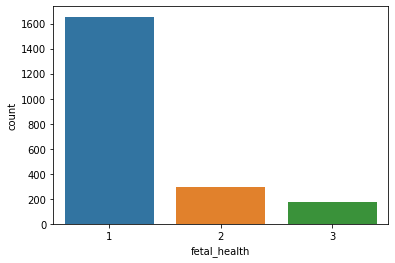

In [12]:
sns.countplot(fetal_data['fetal_health'])

Data visualizations of "fetal health" column makes easier to understand the fetal state, and visualization also makes it easier to detect patterns of the fetal state (Normal, Suspect and Pathological). Hence a bar plot and a pie chart is used to visualize the target column which is “fetal health”. The figures given below shows that the number of ‘Normal’ cases is more followed by ‘Suspect’ cases followed by ‘Pathological’ cases.

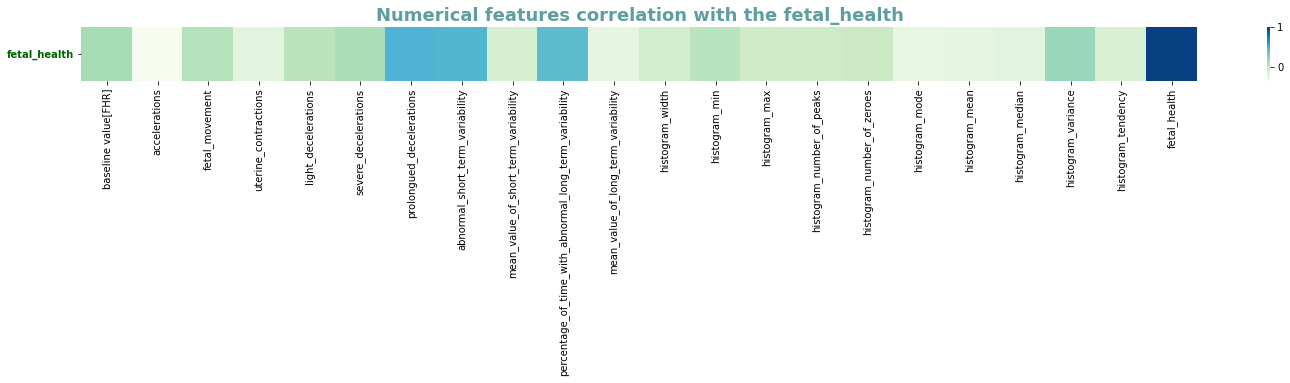

In [13]:
#Checking correlation of numeric features with output variable “Fetal health”
numeric_data = fetal_data.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["fetal_health"], ascending=False).head(1), cmap="GnBu")
plt.title("Numerical features correlation with the fetal_health", weight="bold", fontsize=18, color="#5F9EA0")
plt.yticks(weight="bold", color="darkgreen", rotation=0)

plt.show()

Correlation means association. More precisely it is a measure of the extent to which two variables are related. There are three results of a correlation study. They are

•	A positive correlation: Is a relationship between two variables in which both variables move in the same direction. Therefore as one variable increases the other variable increases, or one variable decreases as the other decreases.

•	A negative correlation: Is a relationship between two variables in which an increase in one variable is associated with a decrease in the other.

•	A zero correlation: It exists when there is no relationship between two variables.

Here, we want to show the correlation between numerical features and the target "fetal health", in order to have a first idea of the connections between features. The table given below shows the correlation of each feature with the target column “fetal health”


From the above table it is clear that three features: prolonged decelerations, abnormal short term variability, percentage of time with abnormal long term variability have high correlation with the target column “fetal health” and four features Uterine contractions, Histogram median, Mean value of long term variability, Histogram mean are highly negatively correlated.

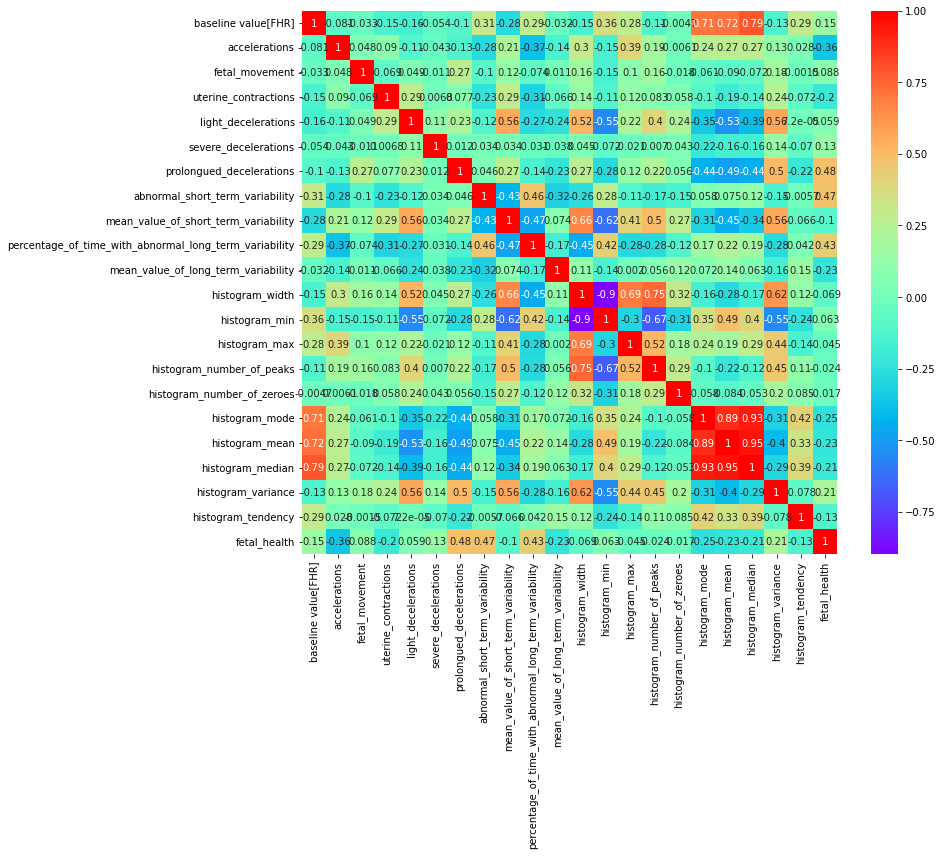

In [14]:
# Finding the Correlation using heat map
corr = fetal_data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='rainbow')
plt.show()

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information. Correlation heat maps are ideal for comparing the measurement for each pair of dimension values.

From the above figure it is clear that the variables Histogram median, Histogram mode and Histogram mean are highly positively correlated which shows that the significance of all the three variables in determining the target column “fetal health” is same. Also the two variables Histogram min and Histogram max are highly negatively correlated. But since all the features are of utmost important none of the features will be removed from the dataset.

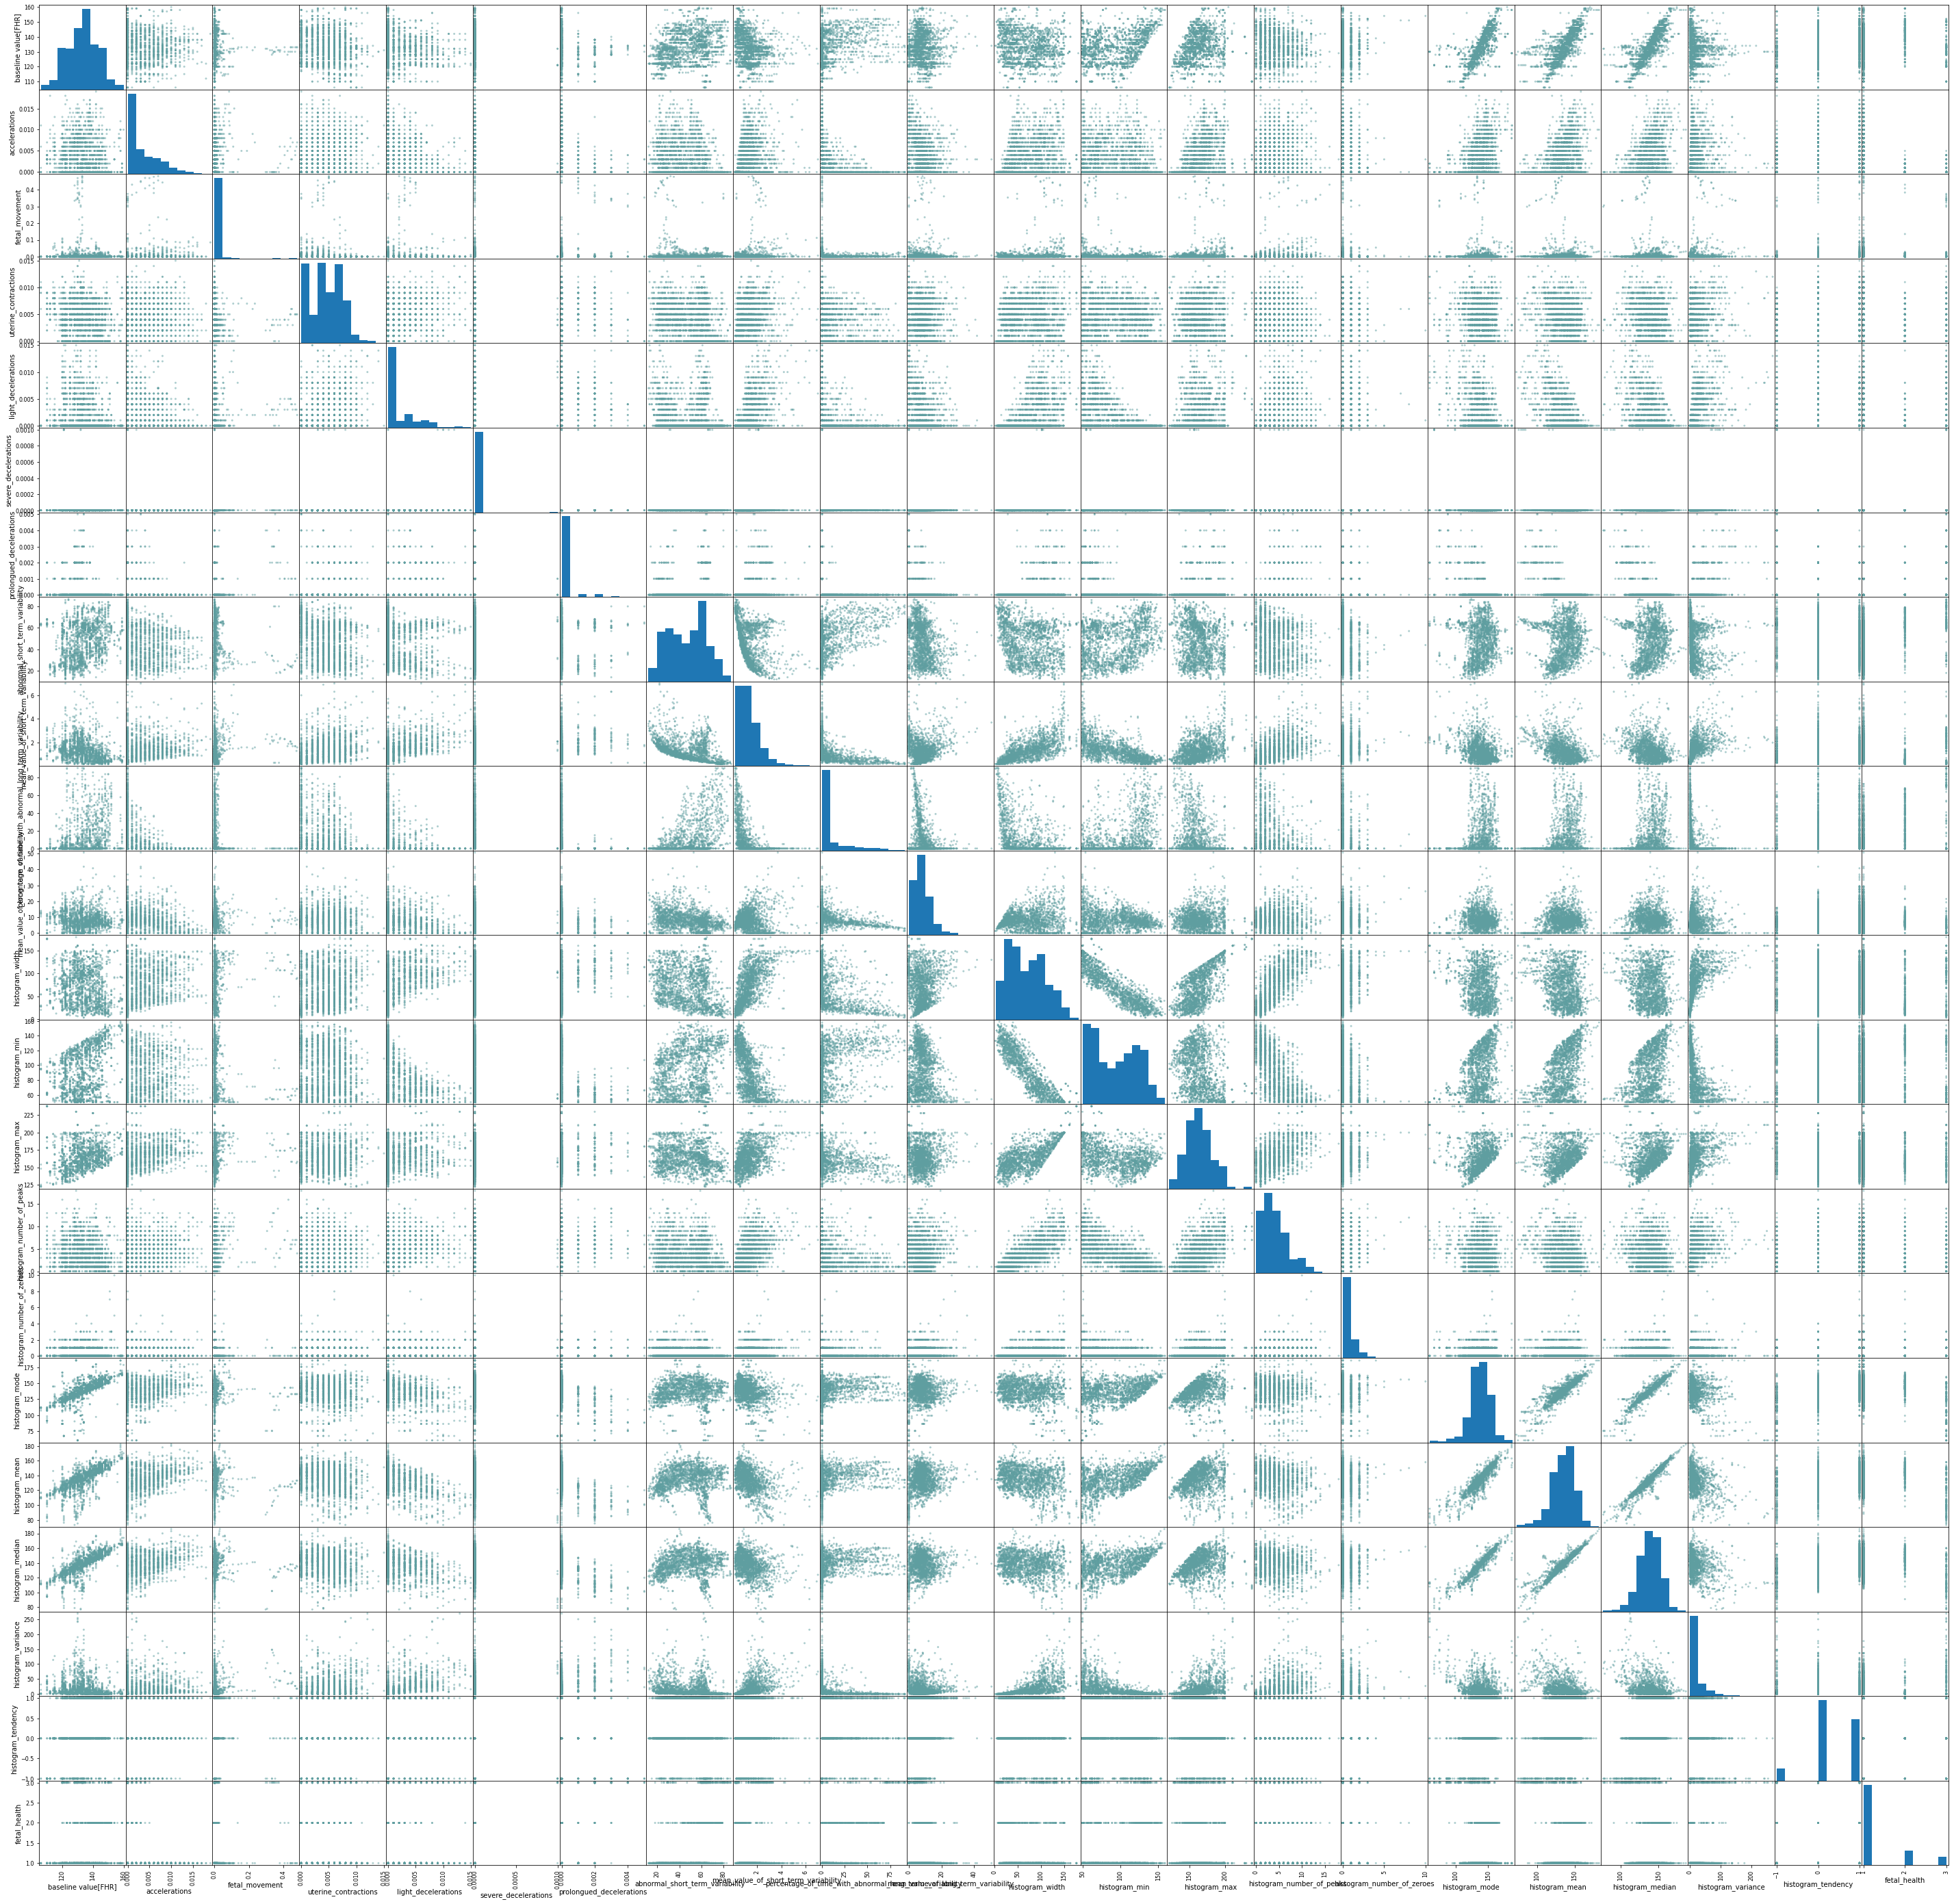

In [15]:
#scatter matrix
from pandas.plotting import scatter_matrix
scatterMatrix = scatter_matrix(fetal_data,figsize=(50, 50), color = "#5F9EA0")

A scatter plot matrix is a grid (or matrix) of scatter plots used to visualize bivariate relationships between combinations of variables. Each scatter plot in the matrix visualizes the relationship between a pair of variables, allowing many relationships to be explored in one chart.

TRAINING AND TESTING THE DATASET WITH VARIOUS MODELS(complete features will be included)

In [17]:
fetal_data.keys()
y=fetal_data.fetal_health
x=fetal_data.drop(["fetal_health"],axis=1)

In [18]:
#SPLITTING THE DATA
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**MODELING USING VARIOUS MODELS**

In [19]:
#kNN CLASSIFIER
model = KNeighborsClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test )

0.8732394366197183

In [20]:
pred = model.predict(x_test)
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,pred)*100))


accuracy score:87.323944


In [21]:
print("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           1       0.91      0.95      0.93       333
           2       0.63      0.56      0.60        64
           3       0.95      0.69      0.80        29

    accuracy                           0.87       426
   macro avg       0.83      0.73      0.77       426
weighted avg       0.87      0.87      0.87       426



[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

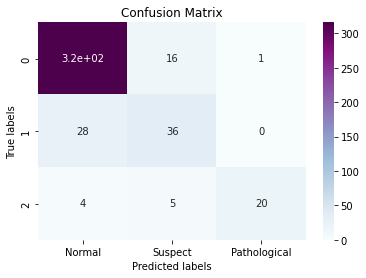

In [23]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax = ax, cmap = "BuPu");

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

In [24]:
#RANDOM FOREST CLASSIFIER
model = RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test )

0.9483568075117371

In [25]:
pred = model.predict(x_test)
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,pred)*100))


accuracy score:94.835681


In [26]:
print("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       333
           2       0.88      0.80      0.84        64
           3       0.90      0.90      0.90        29

    accuracy                           0.95       426
   macro avg       0.91      0.89      0.90       426
weighted avg       0.95      0.95      0.95       426



[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

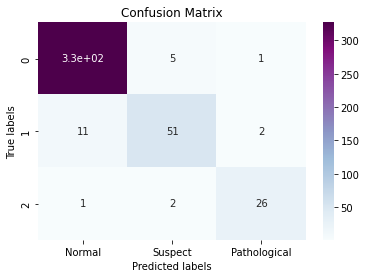

In [27]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax = ax, cmap = "BuPu");

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

In [28]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_test,y_test )

0.9460093896713615

In [29]:
pred = gbc.predict(x_test)
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,pred)*100))


accuracy score:94.600939


In [30]:
print("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       333
           2       0.87      0.83      0.85        64
           3       0.88      0.97      0.92        29

    accuracy                           0.95       426
   macro avg       0.90      0.92      0.91       426
weighted avg       0.95      0.95      0.95       426



[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

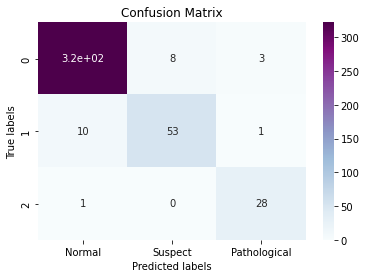

In [31]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax = ax, cmap = "BuPu");

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

In [32]:
#decision tree classifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test )

0.931924882629108

In [33]:
pred = model.predict(x_test)
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,pred)*100))


accuracy score:93.192488


In [34]:
print("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           1       0.97      0.94      0.96       333
           2       0.76      0.86      0.81        64
           3       0.93      0.97      0.95        29

    accuracy                           0.93       426
   macro avg       0.89      0.92      0.90       426
weighted avg       0.94      0.93      0.93       426



[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

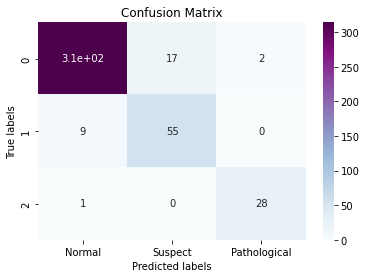

In [35]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax = ax, cmap = "BuPu");

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

**Comparing all the prediction models**

In [36]:
models = []
models.append(('GB', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0   GB  0.950704
1   RF  0.948357
2  KNN  0.873239
3   DT  0.927230


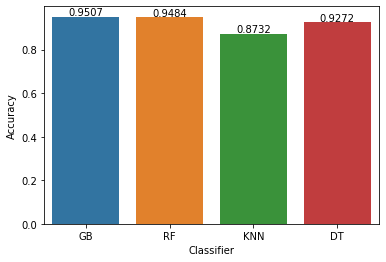

In [37]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

The dataset used in this study is split into two; one for training and the other one for testing, in the ratio 4:1. Now the classification algorithms are modeled over the training dataset and their accuracy, precision, recall and f1 score are evaluated. The algorithms used here are Gradient boost, Random forest, Decision tree and K-Nearest Neighbors.

•	Classification Report: Report which includes Precision, Recall and F1-Score.
1.	Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
Precision = TP/TP+FP
2.	Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.
Recall = TP/TP+FN
3.	F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if there is an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.
F1 Score = 2(Recall Precision) / (Recall + Precision)

Confusion Matrix:  The confusion matrix is a specific table layout that allows visualization of performance of an algorithm. Each row represents the instances in an actual class while each column represents the instances in prediction.


**RESULTS OF MODEL BUILDING WITH ALL THE FEATURES**

The above comparison shows the accuracy scores of classification algorithms. Clearly it can be concluded that gradient boosting is an optimal model of choice of the given dataset as it has relatively the highest combination of accuracy followed by random forest, Decision tree and K-Nearest Neighbors.

***PCA PART OF PROJECT***

Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. It is a statistical method that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation. These newly obtained transformed features are called the Principal Components. It is one of the popular tools that is used for exploratory data analysis and predictive modeling. It is a technique to draw strong patterns from the given dataset by reducing the variances.

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(fetal_data)

StandardScaler()

In [39]:
scaled_data=scaler.transform(fetal_data)
scaled_data

array([[-1.35222005, -0.8223883 , -0.20320955, ...,  1.87056871,
         1.11298001,  1.13258873],
       [-0.1325256 ,  0.73013282, -0.20320955, ..., -0.23499819,
        -0.52452553, -0.49545971],
       [-0.03088439, -0.04612774, -0.20320955, ..., -0.2004807 ,
        -0.52452553, -0.49545971],
       ...,
       [ 0.68060404, -0.56363478, -0.20320955, ..., -0.51113811,
         1.11298001,  1.13258873],
       [ 0.68060404, -0.56363478, -0.20320955, ..., -0.51113811,
         1.11298001,  1.13258873],
       [ 0.88388645, -0.30488126, -0.16034157, ..., -0.61469058,
        -0.52452553, -0.49545971]])

In [40]:
from sklearn.decomposition import PCA
pca=PCA(n_components=14)
pca.fit(scaled_data)

PCA(n_components=14)

In [41]:
x_pca=pca.transform(scaled_data)

In [42]:
scaled_data.shape

(2126, 22)

In [43]:
x_pca.shape

(2126, 14)

In [44]:
x_pca

array([[-0.23500502,  2.92935745,  1.18325108, ...,  1.1288257 ,
         1.21509629,  1.70940705],
       [ 1.9366776 , -2.41041186, -0.68376205, ...,  0.47696941,
        -0.34379969, -0.27110867],
       [ 1.95423383, -2.1735663 , -0.87394504, ...,  0.48383942,
        -0.18758241, -0.14764106],
       ...,
       [-2.09312038, -0.37453849,  1.81872779, ..., -0.05834635,
         0.10087283, -0.24326022],
       [-2.08648319, -0.29955705,  1.92667035, ...,  0.19170893,
        -0.10170511, -0.21004259],
       [-2.32018019,  0.51341244,  0.66692193, ..., -0.04292452,
         0.24024836,  0.2713143 ]])

The dataset used in this study has been reduced into 15 components from 23 components using principal component analysis. It is then split into two; one for training and the other one for testing, in the ratio 4:1. Now the classification algorithms are modeled over the training dataset and their accuracy, precision, recall and f1 score are evaluated. The algorithms used here are Gradient boost, Random forest, Decision tree and K-Nearest Neighbors

**WHY 14 COMPONENTS?**

In [45]:
from sklearn.decomposition import PCA
cumsum = np.cumsum(pca.explained_variance_ratio_)
print (cumsum)
d=np.argmax(cumsum>=0.95)+1

[0.27542342 0.4418342  0.54630067 0.61476749 0.67077568 0.71745921
 0.76254182 0.80465881 0.83939648 0.86964948 0.89590367 0.9197636
 0.93776568 0.95339654]


In [46]:
d=np.argmax(cumsum>=0.95)+1
print (d)

14


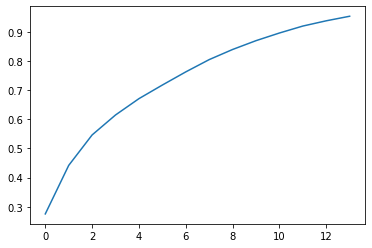

In [47]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

It is understood that the number of dimension can be reduced from 22 to 14 while preserving 95% of its variance. Hence the compressed dataset is of 60 percentage of its original size. Looking at the above plot of the explained variance as a function of the number of principal components , we observe an elbow in the curve. The optimal number of principal components is reached when the cumulative variance stops growing fast.

**SPLITTING THE DATA**

In [48]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

**MODELING USING VARIOUS MODELS**

In [49]:
#kNN CLASSIFIER
model = KNeighborsClassifier()
model.fit(X_train_pca,y_train)
model.score(X_test_pca,y_test )

0.9624413145539906

In [50]:
pred = model.predict(X_test_pca)
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,pred)*100))


accuracy score:96.244131


In [51]:
print("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           1       0.97      1.00      0.98       333
           2       0.93      0.81      0.87        64
           3       0.96      0.90      0.93        29

    accuracy                           0.96       426
   macro avg       0.95      0.90      0.93       426
weighted avg       0.96      0.96      0.96       426



[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

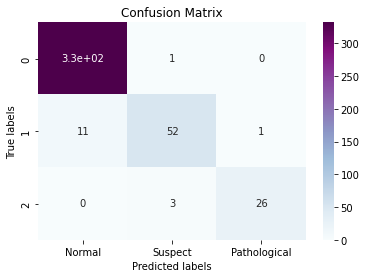

In [52]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax = ax, cmap = "BuPu");

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

In [53]:
#RANDOM FOREST CLASSIFIER
model = RandomForestClassifier()
model.fit(X_train_pca,y_train)
model.score(X_test_pca,y_test )

0.9835680751173709

In [54]:
pred = model.predict(X_test_pca)
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,pred)*100))


accuracy score:98.356808


In [55]:
print("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       333
           2       1.00      0.89      0.94        64
           3       1.00      1.00      1.00        29

    accuracy                           0.98       426
   macro avg       0.99      0.96      0.98       426
weighted avg       0.98      0.98      0.98       426



[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

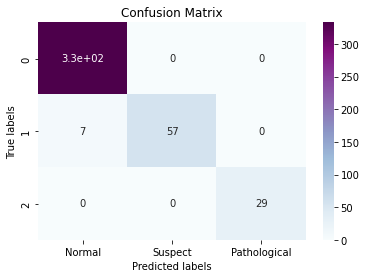

In [56]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax = ax, cmap = "BuPu");

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

In [57]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_pca,y_train)
gbc.score(X_test_pca,y_test )

0.9882629107981221

In [58]:
pred = gbc.predict(X_test_pca)
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,pred)*100))


accuracy score:98.826291


In [59]:
print("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       333
           2       0.98      0.94      0.96        64
           3       0.97      1.00      0.98        29

    accuracy                           0.99       426
   macro avg       0.98      0.98      0.98       426
weighted avg       0.99      0.99      0.99       426



[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

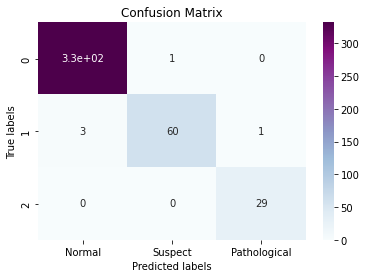

In [60]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax = ax, cmap = "BuPu")

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

In [61]:
#decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train_pca,y_train )
model.score(X_test_pca,y_test )

0.9342723004694836

In [62]:
pred = model.predict(X_test_pca)
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,pred)*100))


accuracy score:93.427230


In [63]:
print("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           1       0.97      0.95      0.96       333
           2       0.76      0.81      0.79        64
           3       0.93      0.97      0.95        29

    accuracy                           0.93       426
   macro avg       0.89      0.91      0.90       426
weighted avg       0.94      0.93      0.94       426



[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

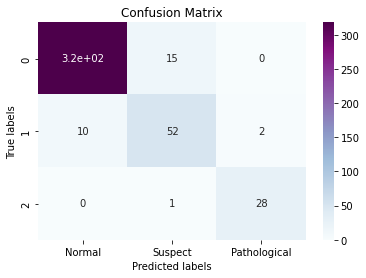

In [64]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax = ax, cmap = "BuPu")

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

**Comparing all the prediction models**

In [65]:
models = []
models.append(('GB', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
names = []
scores = []
for name, model in models:
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0   GB  0.988263
1   RF  0.981221
2  KNN  0.962441
3   DT  0.943662


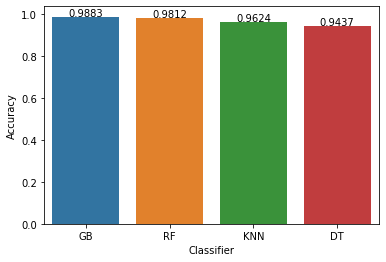

In [66]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

The above comparison shows the accuracy scores of classification algorithms. Clearly it can be concluded that **gradient boosting is an optimal model of choice of the given dataset as it has relatively the highest combination of accuracy followed by random forest, K-Nearest Neighbors and Decision tree.**
Here one of the important results that is obtained, after applying PCA on the dataset and reducing it into **14 components**, we observe that there has been an increase in the accuracies, precision, recall and f1 scores of each of the models. Comparing the two graphs it is clear that there has been a great increase in the accuracy of KNN model from 87% to 96%. The accuracy of gradient boosting model increased from 94% to 98% for random forest it is 98% from 94% and the least increase in accuracy is shown by decision tree that is from 91% to 94%.


***END OF CODE***
